In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sympy import symbols, expand

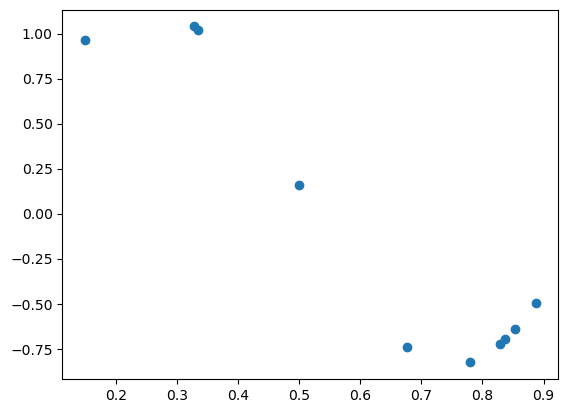

In [83]:
mean = 0
sigma = 0.3

x1 = np.random.uniform(0,1,10)
#x2 = np.linspace(0, 1, 100)
x_data = np.sort(x1)

def data(x):
    f = np.sin(2*np.pi*x) + np.random.normal(loc=0, scale=0.3)
    return f


y_data = data(x_data)

plt.scatter(x_data, y_data)
plt.show()

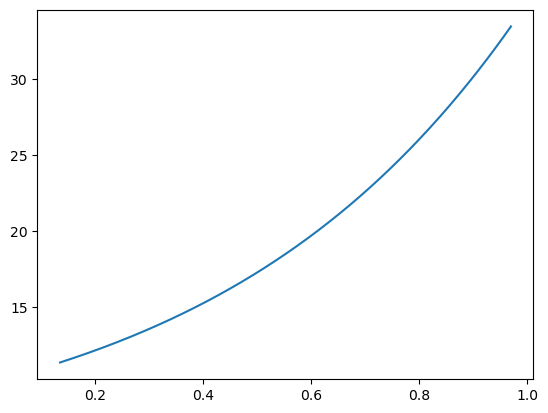

In [90]:
#poly = np.array([])
deg = 10
def polynomial(x, poly):
    result = 0
    for coeff in poly:
        result = x * result + coeff
    return result
    #return np.polyval(poly[::-1], x) #np.polyval reverses the order of the poly array and also it counts the power
                                     # backward from increasing to decreasing.
    
poly = [1, 2, 5, 8, 9, 10]
x_new = np.linspace(x_data.min(), x_data.max(), 500)
#x = 2
#print(polynomial(x, poly))
plt.plot(x_new, polynomial(x_new, poly))
plt.show()

In [92]:
deg = 9
x_new = np.linspace(x_data.min(), x_data.max(), 500)
coeffs = np.polyfit(x_new, y_data, deg)
plt.scatter(x_new, y_data, c='red')
plt.plot(x_new, np.poly1d(coeffs))
plt.show()

TypeError: expected x and y to have same length